### HIV PROJECTION FOR GHANA (2023-2028)

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt



Final values after 5 years:
Susceptible: 29337514
Exposed: 1506
Infectious (Unprotected): 12820
Infectious (Protected): 51245
Recovered (on ART): 431697

Additional statistics:
HIV Prevalence: 1.66%
ART Coverage: 87.08%
Mother-to-child transmission rate: 0.04%
Protection usage among infected: 79.99%


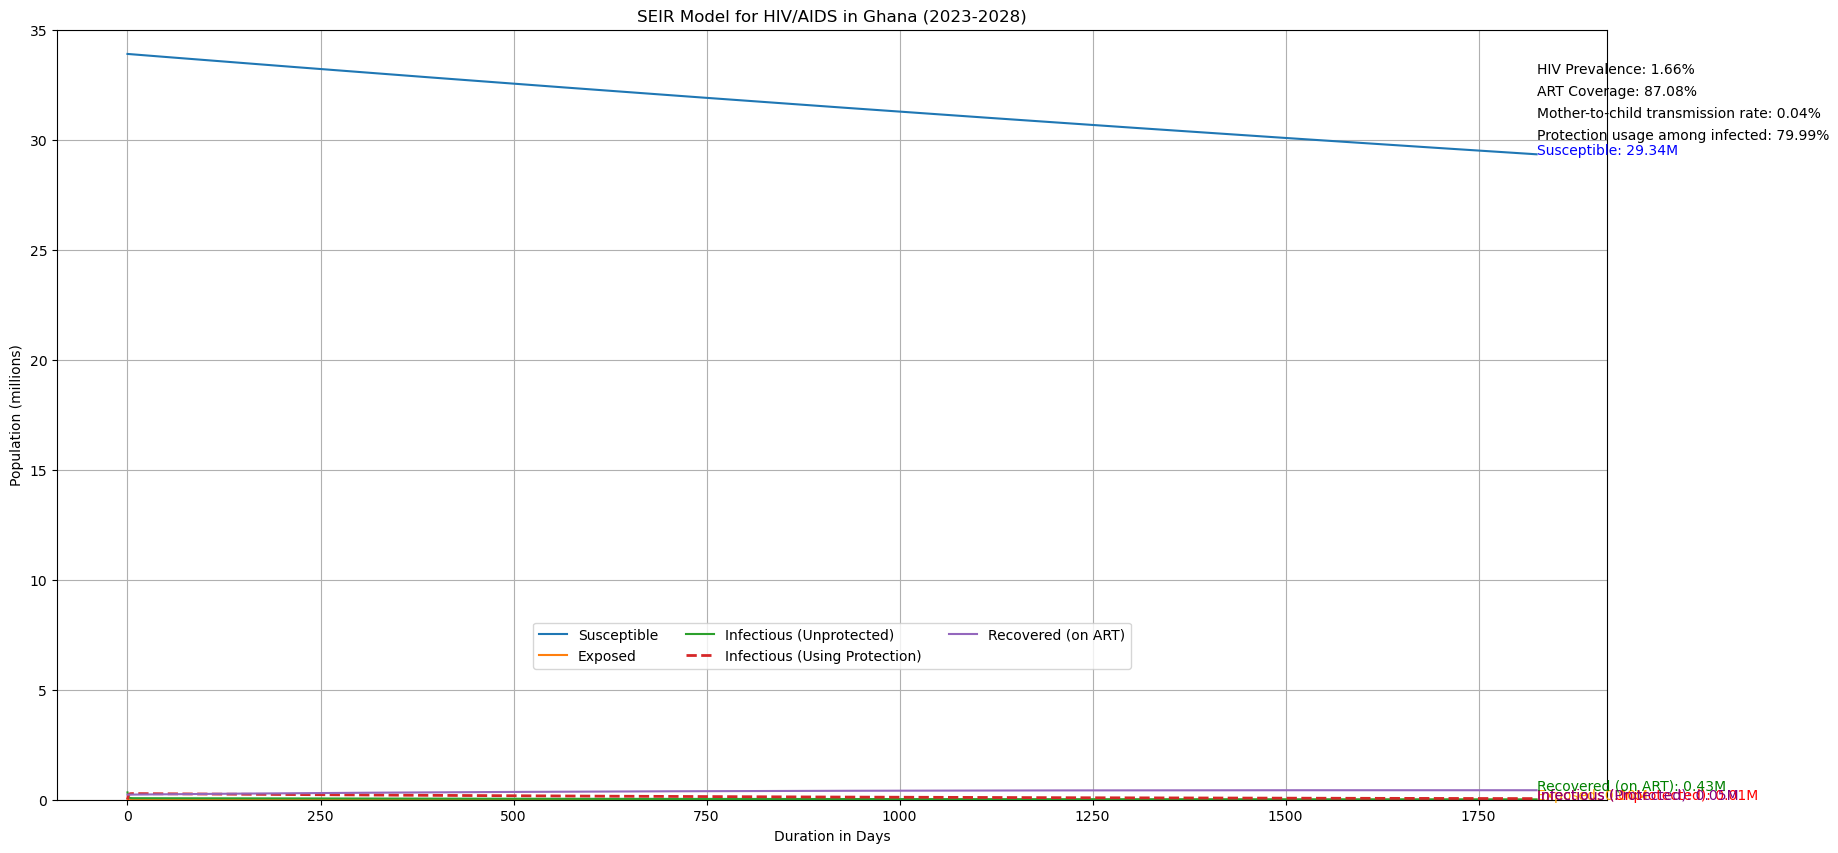

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters (adjusted values for realism)
N = 34500000  # Total population of Ghana (estimated for 2023)
beta = 0.0006  # Incidence rate of HIV AIDS per 1000
beta_p = 0.00001  # Infection rate for protected sex (assuming high effectiveness)
sigma = 1/180  # Incubation rate (assuming 6 months average time from infection to infectiousness)
gamma = 0.0009 # Recovery rate (assuming 10 years average time from infection to AIDS)
mu = 7.8/(1000*N) #Natural death rate 
lambda_ = 3.56/(1000*N)  # Birth rate (crude birth rate of about 40 per 1000 population)
alpha = 0.00007731  # AIDS-related death rate
eta = 0.43762  # Effectiveness of antiretroviral therapy (ART)
rho = 0.694  # Proportion of HIV+ individuals on ART
omega =0.00006  # Rate at which individuals on ART discontinue treatment
epsilon = 0.2 # Mother to child transmission rate
phi = 0.02  # Proportion of adult population that are women of childbearing age
psi = 2/365  # Pregnancy rate for women of childbearing age
xi = 0.8  # Rate at which infected individuals start using protection
zeta = 0.2  # Rate at which protected individuals stop using protection
delta_in = 10/(365*1000)  # Immigration rate
delta_out = -0.1/(365*1000)  # Emigration rate

# Initial conditions
I0 = 334095  # Total number of people living with HIV
E0 = 17774  # Total number of new HIV infections in 2023
R0 = I0 * rho  # Assuming 69.4% of infected are on ART
Ip0 = I0 * 0.05  # Assuming 5% of infected use protection
S0 = N - I0 - E0 - R0 - Ip0

# SEIR model with ART, protected infected, immigration, and emigration
def seir_model(y, t, N, beta, beta_p, sigma, gamma, mu, lambda_, alpha, eta, rho, omega, epsilon, phi, psi, xi, zeta, delta_in, delta_out):
    S, E, I, Ip, R = y
    dSdt = lambda_ * N * (1 - epsilon * (I + Ip) / N) - beta * S * I / N - beta_p * S * Ip / N - mu * S + omega * R - phi * psi * S + delta_in * N - delta_out * S
    dEdt = beta * S * I / N + beta_p * S * Ip / N - (sigma + mu) * E - phi * psi * E - delta_out * E
    dIdt = sigma * E - (gamma + mu + alpha + xi) * I + zeta * Ip - phi * psi * I - delta_out * I
    dIpdt = xi * I - (gamma + mu + alpha + zeta) * Ip - phi * psi * Ip - delta_out * Ip
    dRdt = gamma * (I + Ip) - (mu + omega) * R + rho * sigma * E - phi * psi * R - delta_out * R
    return dSdt, dEdt, dIdt, dIpdt, dRdt

# Time points
t = np.linspace(0, 365 * 5, 365 * 5)  # 5 years, daily resolution

# Solve ODE
solution = odeint(seir_model, [S0, E0, I0, Ip0, R0], t, args=(N, beta, beta_p, sigma, gamma, mu, lambda_, alpha, eta, rho, omega, epsilon, phi, psi, xi, zeta, delta_in, delta_out))
S, E, I, Ip, R = solution.T

# Create DataFrame
df = pd.DataFrame({
    'Day': t,
    'Susceptible': S,
    'Exposed': E,
    'Infectious (Unprotected)': I,
    'Infectious (Protected)': Ip,
    'Recovered (on ART)': R
})

# Matplotlib Plot
plt.figure(figsize=(20, 10))
plt.plot(t, S/1e6, label='Susceptible')
plt.plot(t, E/1e6, label='Exposed')
plt.plot(t, I/1e6, label='Infectious (Unprotected)')
plt.plot(t, Ip/1e6, label='Infectious (Using Protection)', ls='--', lw='2')
plt.plot(t, R/1e6, label='Recovered (on ART)')
plt.title('SEIR Model for HIV/AIDS in Ghana (2023-2028)')
plt.xlabel('Duration in Days')
plt.ylabel('Population (millions)')
plt.ylim(0, 35)  # Fixed y-axis limit
plt.legend(bbox_to_anchor=(0.5, 0.2), loc='center', ncol=3)
plt.grid(True)

# Calculate final values
final_S = S[-1]
final_E = E[-1]
final_I = I[-1]
final_Ip = Ip[-1]
final_R = R[-1]

# Calculate additional statistics
total_population = final_S + final_E + final_I + final_Ip + final_R
hiv_prevalence = (final_I + final_Ip + final_R) / total_population
art_coverage = final_R / (final_I + final_Ip + final_R)
mtct_rate = epsilon * (final_I + final_Ip) / total_population
protection_usage = final_Ip / (final_I + final_Ip)

# Display final values on the plot
plt.text(1825, final_S/1e6, f'Susceptible: {final_S/1e6:.2f}M', color='b')
plt.text(1825, final_E/1e6, f'Exposed: {final_E/1e6:.2f}M', color='orange')
plt.text(1825, final_I/1e6, f'Infectious (Unprotected): {final_I/1e6:.2f}M', color='r')
plt.text(1825, final_Ip/1e6, f'Infectious (Protected): {final_Ip/1e6:.2f}M', color='purple')
plt.text(1825, final_R/1e6, f'Recovered (on ART): {final_R/1e6:.2f}M', color='g')

# Add additional statistics to the plot
plt.text(1825, 33, f'HIV Prevalence: {hiv_prevalence:.2%}', color='black')
plt.text(1825, 32, f'ART Coverage: {art_coverage:.2%}', color='black')
plt.text(1825, 31, f'Mother-to-child transmission rate: {mtct_rate:.2%}', color='black')
plt.text(1825, 30, f'Protection usage among infected: {protection_usage:.2%}', color='black')

# Print final values
print(f"Final values after 5 years:")
print(f"Susceptible: {final_S:.0f}")
print(f"Exposed: {final_E:.0f}")
print(f"Infectious (Unprotected): {final_I:.0f}")
print(f"Infectious (Protected): {final_Ip:.0f}")
print(f"Recovered (on ART): {final_R:.0f}")

print(f"\nAdditional statistics:")
print(f"HIV Prevalence: {hiv_prevalence:.2%}")
print(f"ART Coverage: {art_coverage:.2%}")
print(f"Mother-to-child transmission rate: {mtct_rate:.2%}")
print(f"Protection usage among infected: {protection_usage:.2%}")

# Save and show the plot
plt.savefig('SEIR_Model_in_Ghana_2023-2028.jpeg')
plt.show()


Final values after 5 years:
Susceptible: 29337514
Exposed: 1506
Infectious (Unprotected): 12820
Infectious (Protected): 51245
Recovered (on ART): 431697

Additional statistics:
HIV Prevalence: 1.66%
ART Coverage: 87.08%
Mother-to-child transmission rate: 0.04%
Protection usage among infected: 79.99%


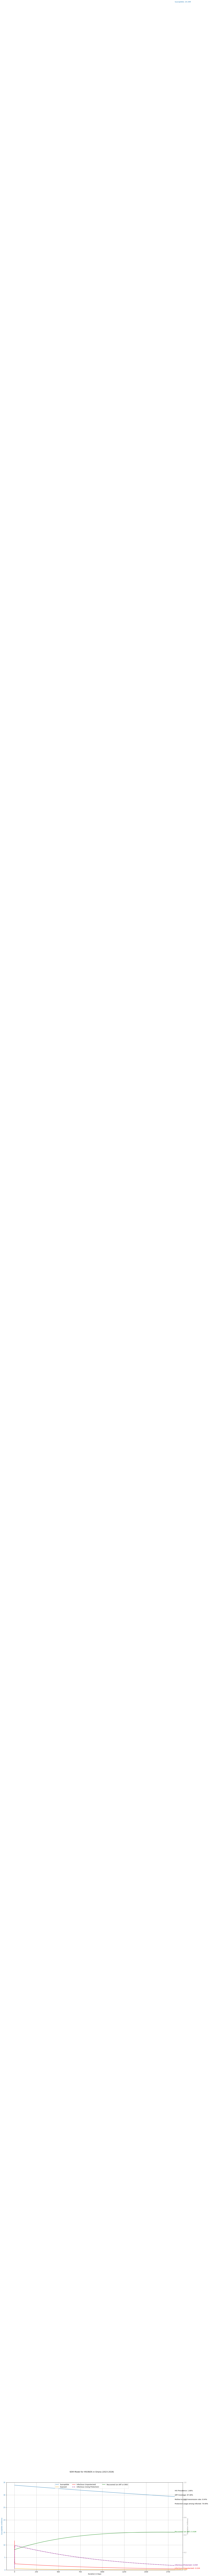

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters (adjusted values for realism)
N = 34500000  # Total population of Ghana (estimated for 2023)
beta = 0.0006  # Incidence rate of HIV AIDS per 1000
beta_p = 0.00001  # Infection rate for protected sex (assuming high effectiveness)
sigma = 1/180  # Incubation rate (assuming 6 months average time from infection to infectiousness)
gamma = 0.0009 # Recovery rate (assuming 10 years average time from infection to AIDS)
mu = 7.8/(1000*N) #Natural death rate 
lambda_ = 3.56/(1000*N)  # Birth rate (crude birth rate of about 40 per 1000 population)
alpha = 0.00007731  # AIDS-related death rate
eta = 0.43762  # Effectiveness of antiretroviral therapy (ART)
rho = 0.694  # Proportion of HIV+ individuals on ART
omega =0.00006  # Rate at which individuals on ART discontinue treatment
epsilon = 0.2 # Mother to child transmission rate
phi = 0.02  # Proportion of adult population that are women of childbearing age
psi = 2/365  # Pregnancy rate for women of childbearing age
xi = 0.8  # Rate at which infected individuals start using protection
zeta = 0.2  # Rate at which protected individuals stop using protection
delta_in = 10/(365*1000)  # Immigration rate
delta_out = -0.1/(365*1000)  # Emigration rate

# Initial conditions
I0 = 334095  # Total number of people living with HIV
E0 = 17774  # Total number of new HIV infections in 2023
R0 = I0 * rho  # Assuming 69.4% of infected are on ART
Ip0 = I0 * 0.05  # Assuming 5% of infected use protection
S0 = N - I0 - E0 - R0 - Ip0

# SEIR model with ART, protected infected, immigration, and emigration
def seir_model(y, t, N, beta, beta_p, sigma, gamma, mu, lambda_, alpha, eta, rho, omega, epsilon, phi, psi, xi, zeta, delta_in, delta_out):
    S, E, I, Ip, R = y
    dSdt = lambda_ * N * (1 - epsilon * (I + Ip) / N) - beta * S * I / N - beta_p * S * Ip / N - mu * S + omega * R - phi * psi * S + delta_in * N - delta_out * S
    dEdt = beta * S * I / N + beta_p * S * Ip / N - (sigma + mu) * E - phi * psi * E - delta_out * E
    dIdt = sigma * E - (gamma + mu + alpha + xi) * I + zeta * Ip - phi * psi * I - delta_out * I
    dIpdt = xi * I - (gamma + mu + alpha + zeta) * Ip - phi * psi * Ip - delta_out * Ip
    dRdt = gamma * (I + Ip) - (mu + omega) * R + rho * sigma * E - phi * psi * R - delta_out * R
    return dSdt, dEdt, dIdt, dIpdt, dRdt

# Time points
t = np.linspace(0, 365 * 5, 365 * 5)  # 5 years, daily resolution

# Solve ODE
solution = odeint(seir_model, [S0, E0, I0, Ip0, R0], t, args=(N, beta, beta_p, sigma, gamma, mu, lambda_, alpha, eta, rho, omega, epsilon, phi, psi, xi, zeta, delta_in, delta_out))
S, E, I, Ip, R = solution.T

# Create DataFrame
df = pd.DataFrame({
    'Day': t,
    'Susceptible': S,
    'Exposed': E,
    'Infectious (Unprotected)': I,
    'Infectious (Protected)': Ip,
    'Recovered (on ART)': R
})

# Matplotlib Plot with twin y-axis
fig, ax1 = plt.subplots(figsize=(20, 10))

color = 'tab:blue'
ax1.set_xlabel('Duration in Days')
ax1.set_ylabel('Susceptible (millions)', color=color)
ax1.plot(t, S/1e6, color=color, label='Susceptible')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 35)  # Fixed y-axis limit for Susceptible

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:gray'
ax2.set_ylabel('Population (millions)', color=color)  # we already handled the x-label with ax1
ax2.plot(t, E/1e6, label='Exposed', color='orange')
ax2.plot(t, I/1e6, label='Infectious (Unprotected)', color='red')
ax2.plot(t, Ip/1e6, label='Infectious (Using Protection)', ls='--', lw='2', color='purple')
ax2.plot(t, R/1e6, label='Recovered (on ART or ARV)', color='green')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 1)  # Fixed y-axis limit for other groups

# Title and legend
fig.suptitle('SEIR Model for HIV/AIDS in Ghana (2023-2028)')
fig.legend(loc='center', bbox_to_anchor=(0.5, 0.85), ncol=3)
ax1.grid(True)

# Calculate final values
final_S = S[-1]
final_E = E[-1]
final_I = I[-1]
final_Ip = Ip[-1]
final_R = R[-1]

# Calculate additional statistics
total_population = final_S + final_E + final_I + final_Ip + final_R
hiv_prevalence = (final_I + final_Ip + final_R) / total_population
art_coverage = final_R / (final_I + final_Ip + final_R)
mtct_rate = epsilon * (final_I + final_Ip) / total_population
protection_usage = final_Ip / (final_I + final_Ip)

# Display final values on the plot
ax2.text(1825, final_S/1e6, f'Susceptible: {final_S/1e6:.2f}M', color='tab:blue')
ax2.text(1825, final_E/1e6, f'Exposed: {final_E/1e6:.2f}M', color='orange')
ax2.text(1825, final_I/1e6, f'Infectious (Unprotected): {final_I/1e6:.2f}M', color='red')
ax2.text(1825, final_Ip/1e6, f'Infectious (Protected): {final_Ip/1e6:.2f}M', color='purple')
ax2.text(1825, final_R/1e6, f'Recovered (on ART): {final_R/1e6:.2f}M', color='green')

# Add additional statistics to the plot
ax2.text(1825, 0.9, f'HIV Prevalence: {hiv_prevalence:.2%}', color='black')
ax2.text(1825, 0.85, f'ART Coverage: {art_coverage:.2%}', color='black')
ax2.text(1825, 0.8, f'Mother-to-child transmission rate: {mtct_rate:.2%}', color='black')
ax2.text(1825, 0.75, f'Protection usage among infected: {protection_usage:.2%}', color='black')

# Print final values
print(f"Final values after 5 years:")
print(f"Susceptible: {final_S:.0f}")
print(f"Exposed: {final_E:.0f}")
print(f"Infectious (Unprotected): {final_I:.0f}")
print(f"Infectious (Protected): {final_Ip:.0f}")
print(f"Recovered (on ART): {final_R:.0f}")

print(f"\nAdditional statistics:")
print(f"HIV Prevalence: {hiv_prevalence:.2%}")
print(f"ART Coverage: {art_coverage:.2%}")
print(f"Mother-to-child transmission rate: {mtct_rate:.2%}")
print(f"Protection usage among infected: {protection_usage:.2%}")

# Save and show the plot
plt.savefig('SEIR_Model_in_Ghana_2023-2028_twin_axis.jpeg')
plt.show()
